# Inscriptions as data: digital epigraphy in macro-historical perspective

Part 2
Python

In [3]:
# Python requirements (when in Python kernel):

!pip install sddk scipy seaborn plotly kaleido matplotlib
import scipy
from scipy.stats import trapz
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
import sddk
import requests


     |████████████████████████████████| 27.3 MB 97 kB/s  eta 0:00:01    |███▋                            | 3.1 MB 2.1 MB/s eta 0:00:12     |████████                        | 6.8 MB 5.3 MB/s eta 0:00:04     |█████████████████████████▌      | 21.7 MB 6.3 MB/s eta 0:00:01
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
     |████████████████████████████████| 13.2 MB 11.8 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=269f0c2fb37861228e4299aac31944c22aa98282282c4fd5f6700ae14744d8e7
  Stored in directory: /home/petra/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [4]:
# Loading the EDH dataset from public folder on Sciencedata.dk using sddk package

publicfolder = "b6b6afdb969d378b70929e86e58ad975"
EDH = sddk.read_file("EDH_text_cleaned_2021-01-21.json", "df", publicfolder)
EDH.head(5)

reading file located in a public folder


,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,...,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,findspot,year_of_find,present_location,religion,geography,social_economic_legal_history,military
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,...,D M Noniae P f Optatae et C Iulio Artemoni par...,Dis Manibus Noniae Publi filiae Optatae et Cai...,Dis Manibus Noniae Publi filiae Optatae et Cai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",NaN,...,C Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,"Via Nomentana, S. Alessandro, Kirche",1937,NaN,NaN,NaN,NaN,NaN
2,Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,...,ummio isenna Xv,Publio Mummio Publi filio Galeria Sisennae Rut...,Publio Mummio Publi filio Galeria Sisennae Rut...,NaN,before 1975,"Sevilla, Privatbesitz",NaN,NaN,NaN,NaN
3,Gräf,votive inscription,2.5 cm,0200,"AE 1983, 0533. (B); A.U. Stylow, Gerión 1, 198...",checked with photo,(39) cm,[ ]AVS[ ]LLA / M PORCI NIGRI SER / DOMINAE VEN...,[{'name': '[---?]AV(?)S(?)[---]L(?)L(?)A M. Po...,18 cm,...,AVSLLA M Porci Nigri ser dominae Veneri aram p...,AVS LLA Marci Porci Nigri serva dominae Veneri...,AVS LLA Marci Porci Nigri serva dominae Veneri...,NaN,before 1979,"Carcabuey, Grupo Escolar",names of pagan deities,NaN,NaN,NaN
4,Feraudi,epitaph,NaN,0200,"AE 1983, 0078. (B); A. Ferrua, RAL 36, 1981, 1...",no image,NaN,[ ] L SVCCESSVS / [ ] L L IRENAEVS / [ ] C L T...,"[{'person_id': '1', 'name': '[---]l. Successus...",NaN,...,l Successus L l Irenaeus C l Tyches unt renti f,libertus Successus Luci libertus Irenaeus Cai ...,libertus Successus Luci libertus Irenaeus Cai ...,Via Cupa (ehem. Vigna Nardi),NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Loading the EDCS dataset from public folder on Sciencedata.dk using sddk package

publicfolder = "1f5f56d09903fe259c0906add8b3a55e"
EDCS = sddk.read_file("EDCS_text_cleaned_2021-03-01.json", "df", publicfolder)
EDCS.head(5)

reading file located in a public folder


,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,dating from,dating to,start_yr,end_yr_1,status,Latitude,Longitude,photo,Material,Comment
0,EDCS-31400030,"CIL 03, 12297",Achaia,Achaia,?,?,{},,{},{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EDCS-24700151,"CIL 01, 02650 (p 1097) = IG-05-01, 00741 = ILL...",Achaia,Achaia,Afesou,Afesou,{},,{},{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EDCS-24900077,"CIL 01, 00746 (p 944) = D 00867 = ILLRP 00374 ...",Achaia,Achaia,Agia Triada / Merbaka / Midea,"[Agia Triada, Merbaka, Midea]",-68,,"[officium/professio, ordo senatorius, tituli h...",tituli honorarii,...,-68,-68,-68.0,-68.0,officium/professio; ordo senatorius; tituli ho...,37.6381128,22.8052991,http://db.edcs.eu/epigr/bilder.php?bilder.php?...,NaN,NaN
3,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"[Agios Athanasios, Photike]",313,,"[Augusti/Augustae, litterae erasae, ordo eques...",tituli honorarii,...,309,313,309.0,313.0,Augusti/Augustae; litterae erasae; ordo equest...,39.4512182,20.7667673,http://db.edcs.eu/epigr/bilder.php?bilder.php?...,NaN,NaN
4,EDCS-55701593,"AE 2009, 01286a",Achaia,Achaia,Agios Donatos / Photike,"[Agios Donatos, Photike]",{},,"[sigilla impressa, tituli fabricationis]",tituli fabricationis,...,NaN,NaN,NaN,NaN,sigilla impressa; tituli fabricationis,39.4759759,20.5069076,NaN,opus figlinae,NaN


## Dealing with biases - modelling temporal uncertainty in historical datasets

** this section is not finished **

Tempun https://github.com/sdam-au/tempun functions explained on epigraphic examples

Methodological introduction into modelling of chronological historic datasets.

## Inscriptions in space and time

** this section is not finished **

We will use Python function and the datasets to create a chronological pverview of the dataset, using the tempun models and the EDH and EDCS datasets.

- Display all inscriptions over time in R, using the reticulate/tempun
- Display inscriptions by province over time
- Display inscriptions by their type over time
- Display all milestones along with roads (and cities), link to DigLit research, Tom's Minerva, Bara etc.

In [8]:
# Load and execute script for modelling dates - TEMPUN
script_url = "https://raw.githubusercontent.com/sdam-au/tempun/master/scripts/modelling_distributions.py"
# Execute the script
exec(requests.get(script_url).content)

### Epigraphic production over time based on the EDH dataset

In [6]:
# EDH dataset
EDH["not_after"] = pd.to_numeric(EDH["not_after"])
EDH["not_before"] = pd.to_numeric(EDH["not_before"])

### How many inscriptions have at least one date
EDH_dated = EDH[(EDH["not_before"].notnull()) | (EDH["not_after"].notnull())]
len(EDH_dated)

59788

In [7]:
# How many inscriptions do not have the end date
len(EDH_dated[EDH_dated["not_after"].isnull()])

3507

In [9]:
%%time
# Generate a list of 1000 random dates for each inscription in the dataset

EDH["random_dates"] = EDH.apply(lambda row: model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

CPU times: user 57.5 s, sys: 1.25 s, total: 58.8 s
Wall time: 58.9 s


In [10]:
%%time
# Count random dates in temporal bins (timeblocks) in a specified time range

EDH_complete_simulations = timeblocks_from_randoms(EDH, "random_dates", [-200, 600, 25])

CPU times: user 9.59 s, sys: 45.2 ms, total: 9.64 s
Wall time: 9.65 s


In [11]:
# Output of the first of 1000 simulations, total numbers of inscriptions counted in timeblocks
EDH_complete_simulations[0]

[((-200, -176), 13),
 ((-175, -151), 22),
 ((-150, -126), 23),
 ((-125, -101), 51),
 ((-100, -76), 109),
 ((-75, -51), 113),
 ((-50, -26), 270),
 ((-25, -1), 772),
 ((1, 25), 2405),
 ((26, 50), 2610),
 ((51, 75), 2935),
 ((76, 100), 3846),
 ((101, 125), 5217),
 ((126, 150), 5423),
 ((151, 175), 6128),
 ((176, 200), 6551),
 ((201, 225), 6114),
 ((226, 250), 5400),
 ((251, 275), 3429),
 ((276, 300), 2749),
 ((301, 325), 946),
 ((326, 350), 696),
 ((351, 375), 705),
 ((376, 400), 643),
 ((401, 425), 425),
 ((426, 450), 351),
 ((451, 475), 302),
 ((476, 500), 329),
 ((501, 525), 197),
 ((526, 550), 215),
 ((551, 575), 203),
 ((576, 600), 225)]

In [12]:
%%time
# Inscriptions by type over time

simulations_by_type_len = []

for ins_type in EDH["type_of_inscription_clean"].unique():
    if ins_type != "NULL":
        subset_df = EDH[EDH["type_of_inscription_clean"]==ins_type]
        simulations_by_type_len.append((ins_type, len(subset_df)))
simulations_by_type_len = sorted(simulations_by_type_len, key = lambda x: x[1], reverse=True)
simulations_by_type_len

simulations_by_type = []

for ins_type_tup in simulations_by_type_len[:10]:
    subset_df = EDH[EDH["type_of_inscription_clean"]==ins_type_tup[0]]
    simulations = timeblocks_from_randoms(subset_df, "random_dates", [-200, 600, 25])
    ins_type_N =len(subset_df)
    simulations_by_type.append([ins_type_tup[0],ins_type_N, simulations]) 
simulations_by_type = sorted(simulations_by_type, key=lambda x: x[1], reverse=True)

date_vars_by_instypes = []
for ins_type_tup in simulations_by_type_len[:10]:
    subset_df = EDH[EDH["type_of_inscription_clean"]==ins_type_tup[0]]
    date_vars = []
    for n in range(100):
        date_vars.append([date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

CPU times: user 16.8 s, sys: 194 ms, total: 17 s
Wall time: 17 s


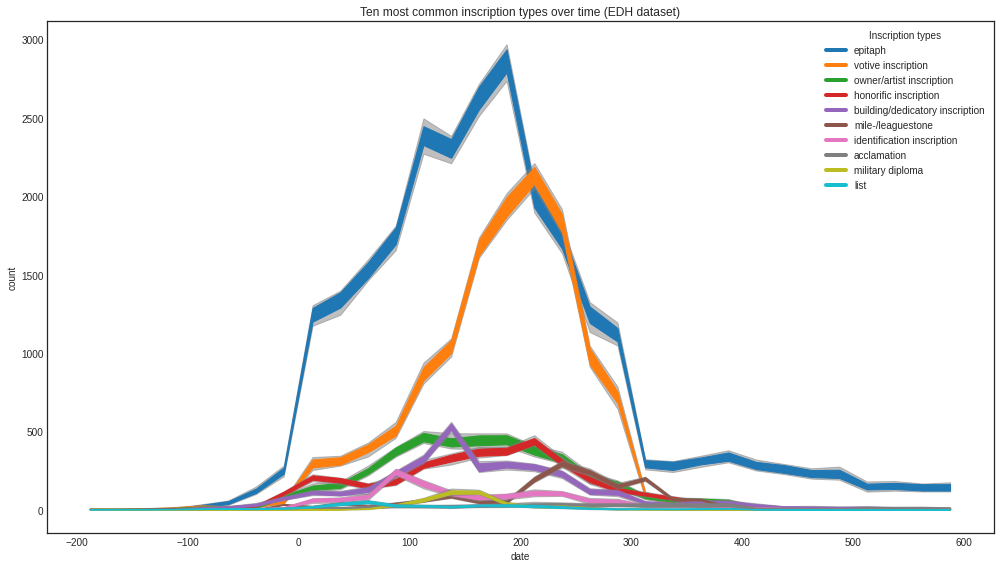

In [14]:
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, ax  = plt.subplots(figsize=(14, 8), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type, tab_colors_list[:len(simulations_by_type)]):
    plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)
    
ax.set_xlabel("date")
ax.set_ylabel("count")
ax.set_title("Ten most common inscription types over time (EDH dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type)]]
plt.legend(markers, [tup[0] for tup in simulations_by_type], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')

### Epigraphic production over time based on the EDSC dataset

In [19]:
# EDCS dataset
EDCS["start_yr"] = pd.to_numeric(EDCS["start_yr"])
EDCS["end_yr_1"] = pd.to_numeric(EDCS["end_yr_1"])

### how many of the inscriptions have at least one date
EDCS_dated = EDCS[(EDCS["start_yr"].notnull()) | (EDCS["end_yr_1"].notnull())]
len(EDCS_dated)

164452

In [22]:
# How many inscriptions do not have the end date
len(EDCS_dated[EDCS_dated["end_yr_1"].isnull()])

117

In [23]:
%%time
# Generate a list of 1000 random dates for each inscription in the dataset

EDCS["random_dates"] = EDCS.apply(lambda row: model_date(row["start_yr"], row["end_yr_1"], size=1000,), axis=1)

CPU times: user 3min 21s, sys: 4.5 s, total: 3min 25s
Wall time: 3min 27s


In [24]:
%%time
# Count random dates in temporal bins (timeblocks) in a specified time range

EDCS_complete_simulations = timeblocks_from_randoms(EDCS, "random_dates", [-200, 600, 25])

CPU times: user 27.2 s, sys: 151 ms, total: 27.4 s
Wall time: 27.4 s


In [25]:
# Output of the first of 1000 simulations, total numbers of inscriptions counted in timeblocks
EDCS_complete_simulations[0]

[((-200, -176), 189),
 ((-175, -151), 176),
 ((-150, -126), 282),
 ((-125, -101), 453),
 ((-100, -76), 989),
 ((-75, -51), 1052),
 ((-50, -26), 2019),
 ((-25, -1), 4076),
 ((1, 25), 11404),
 ((26, 50), 11067),
 ((51, 75), 10895),
 ((76, 100), 10525),
 ((101, 125), 12354),
 ((126, 150), 11376),
 ((151, 175), 11154),
 ((176, 200), 12267),
 ((201, 225), 11192),
 ((226, 250), 8157),
 ((251, 275), 5488),
 ((276, 300), 4909),
 ((301, 325), 4966),
 ((326, 350), 4446),
 ((351, 375), 5071),
 ((376, 400), 4975),
 ((401, 425), 2978),
 ((426, 450), 2427),
 ((451, 475), 2173),
 ((476, 500), 2057),
 ((501, 525), 723),
 ((526, 550), 625),
 ((551, 575), 487),
 ((576, 600), 466)]

In [35]:
# does not work because incr type is in a different format
EDCS_dated["inscr_type"]

2                                          tituli honorarii
3                                          tituli honorarii
9                                                        {}
10                                                       {}
13                                                    leges
                                ...                        
500612                                                   {}
500613                                                   {}
500614                                                   {}
500615    [inscriptiones christianae, tituli operum, tit...
500616           [inscriptiones christianae, tituli operum]
Name: inscr_type, Length: 164452, dtype: object

In [27]:
%%time
# Inscriptions by type over time

simulations_by_type_len = []

for ins_type in EDCS["inscr_type"].unique():
    if ins_type != "NULL":
        subset_df = EDCS[EDCS["inscr_type"]==ins_type]
        simulations_by_type_len.append((ins_type, len(subset_df)))
simulations_by_type_len = sorted(simulations_by_type_len, key = lambda x: x[1], reverse=True)
simulations_by_type_len

simulations_by_type = []

for ins_type_tup in simulations_by_type_len[:10]:
    subset_df = EDCS[EDCS["inscr_type"]==ins_type_tup[0]]
    simulations = timeblocks_from_randoms(subset_df, "random_dates", [-200, 600, 25])
    ins_type_N =len(subset_df)
    simulations_by_type.append([ins_type_tup[0],ins_type_N, simulations]) 
simulations_by_type = sorted(simulations_by_type, key=lambda x: x[1], reverse=True)

date_vars_by_instypes = []
for ins_type_tup in simulations_by_type_len[:10]:
    subset_df = EDCS[EDCS["inscr_type"]==ins_type_tup[0]]
    date_vars = []
    for n in range(100):
        date_vars.append([date_var[n] for date_var in subset_df["random_dates"] if date_var != None])
    date_vars_by_instypes.append(date_vars)

TypeError: unhashable type: 'dict'

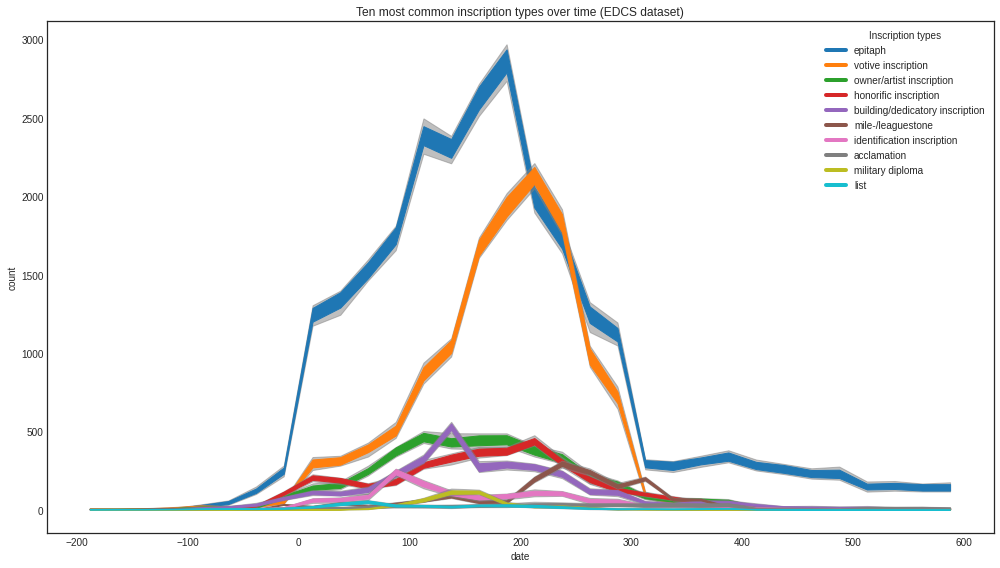

In [34]:
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())
plt.style.use("seaborn-white")

fig, ax  = plt.subplots(figsize=(14, 8), tight_layout=True)

for ins_type_sims, color in zip(simulations_by_type, tab_colors_list[:len(simulations_by_type)]):
    plot_timeblocks_data(ins_type_sims[2], ax=ax, color=color)
    
ax.set_xlabel("date")
ax.set_ylabel("count")
ax.set_title("Ten most common inscription types over time (EDCS dataset)")
 
markers = [plt.Line2D([0,0],[0,0],color=color, lw=4) for color in tab_colors_list[:len(simulations_by_type)]]
plt.legend(markers, [tup[0] for tup in simulations_by_type], numpoints=1,  title="Inscription types", bbox_to_anchor=(1, 1), loc='upper right')